# Exercise No. 5

Name: Aleksandra Olshanova

ID:728945613

Don't bother match the plots same style unless otherwise specified.

## Import Libraries

**Import the libraries you usually use for data analysis.**

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### The data:

In [92]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['wine']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['wine']='white'

df_wine = pd.concat([df, df2], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


**1. Make the boxplots using the sns.boxplot.**

<AxesSubplot:>

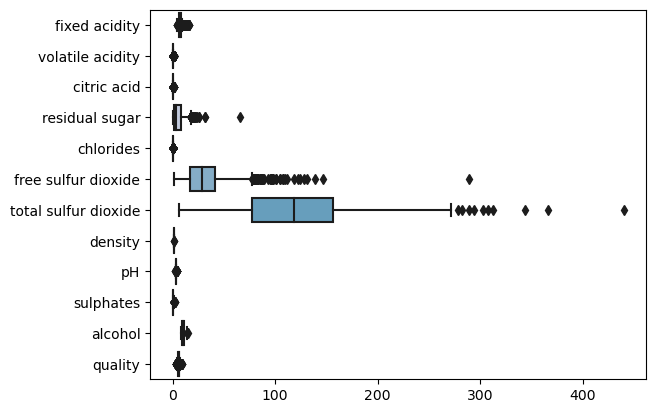

In [93]:
ax = sns.boxplot(data=df_wine, orient="h", palette='PuBuGn')
ax

As you can see, the values ​​of the variables are on different scales. 
To visualize it better apply logarithmic scale. Use ax.set_xscale('log')

<AxesSubplot:>

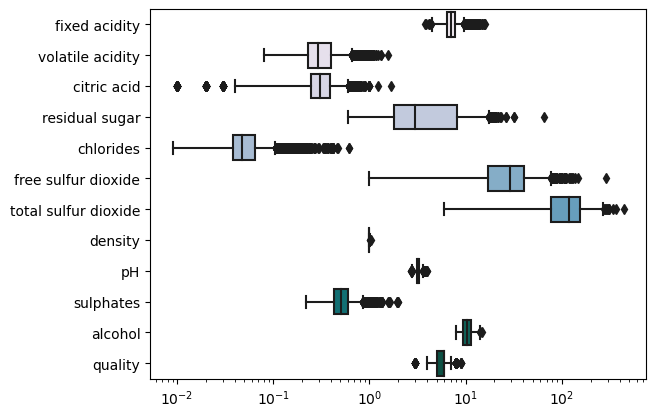

In [94]:
ax = sns.boxplot(data=df_wine, orient="h", palette='PuBuGn')
ax.set_xscale('log')
ax

As we can see, the means of the data vary a lot. This happens because the data is on different scales, meaning that different units are used to measure the different features. It is possible to **rescale the data**, which means centering the means of the data. 

**2.  Violin plots can be used to vizualize both the distribution of the data and the posible outliers in the same figure.** Use it to plot the  alcohol distributions for the different qualities.


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

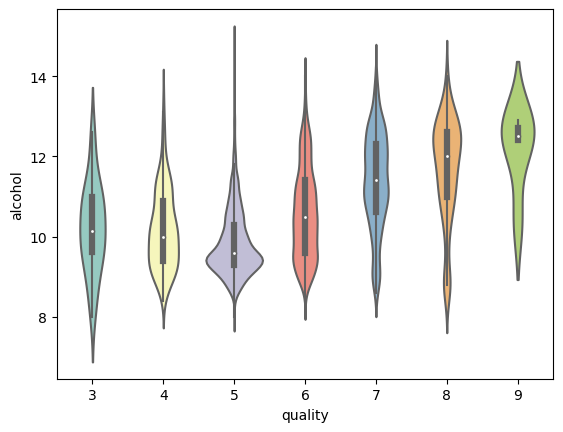

In [95]:
sns.violinplot(x="quality",y="alcohol",data=df_wine, palette="Set3")

**3. Make a small heatmap to observe different correlations between all the variables**

Hint: np.triu(correlation), check out mask parameter on sns.heatmap().<br>
figsize=(10, 8)

In [96]:
correlation = df_wine.corr(method='pearson')

<AxesSubplot:>

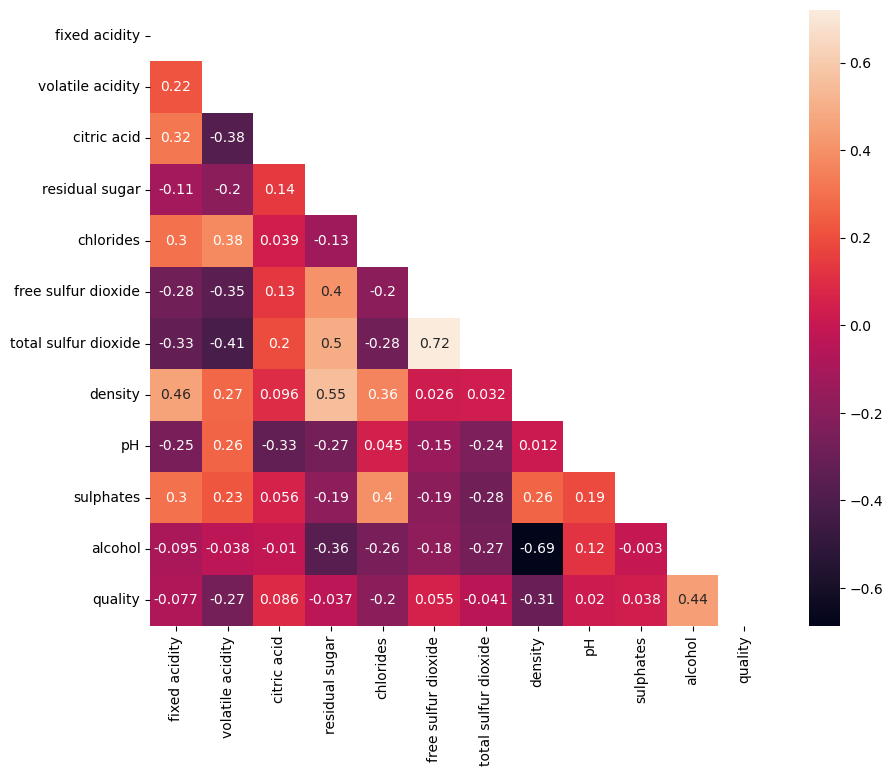

In [97]:
fig=plt.gcf()
fig.set_size_inches(10, 8)
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation)))

**4. Use StandardScaler to normilize the data, and plot it again:**

In [98]:
df_wine_pca = df_wine.drop(labels = ['wine', 'quality'], axis = 1)
sc = StandardScaler()
df_wine_pca_transformed = sc.fit_transform(df_wine_pca)
df_wine_pca_transformed 

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

<AxesSubplot:>

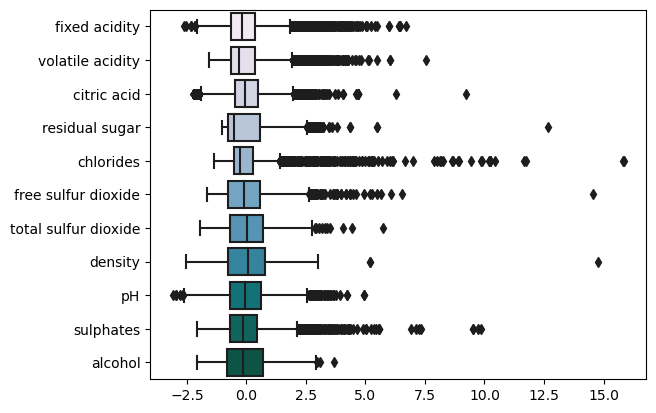

In [99]:
PCA_wine = pd.DataFrame(df_wine_pca_transformed , columns = list(df_wine_pca.columns))
ax_new = sns.boxplot(data = PCA_wine , orient='h', palette='PuBuGn')
ax_new


**5. Now use PCA(n_components=2) to reduce dimensions :**

In [100]:
pca = PCA(n_components=2)
pca.fit(df_wine_pca_transformed)
x_pca = pca.transform(df_wine_pca_transformed)
x_pca

array([[-3.20599617,  0.41652332],
       [-3.03905081,  1.10746213],
       [-3.07189347,  0.87896444],
       ...,
       [ 0.5711325 , -0.72266165],
       [ 0.09005243, -3.54577991],
       [ 0.51257566, -2.89104008]])

**6. Plot the datapoints with the new components: (set to alpha=0.3 so the datapoints wil be seen)**

<AxesSubplot:title={'center':'2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

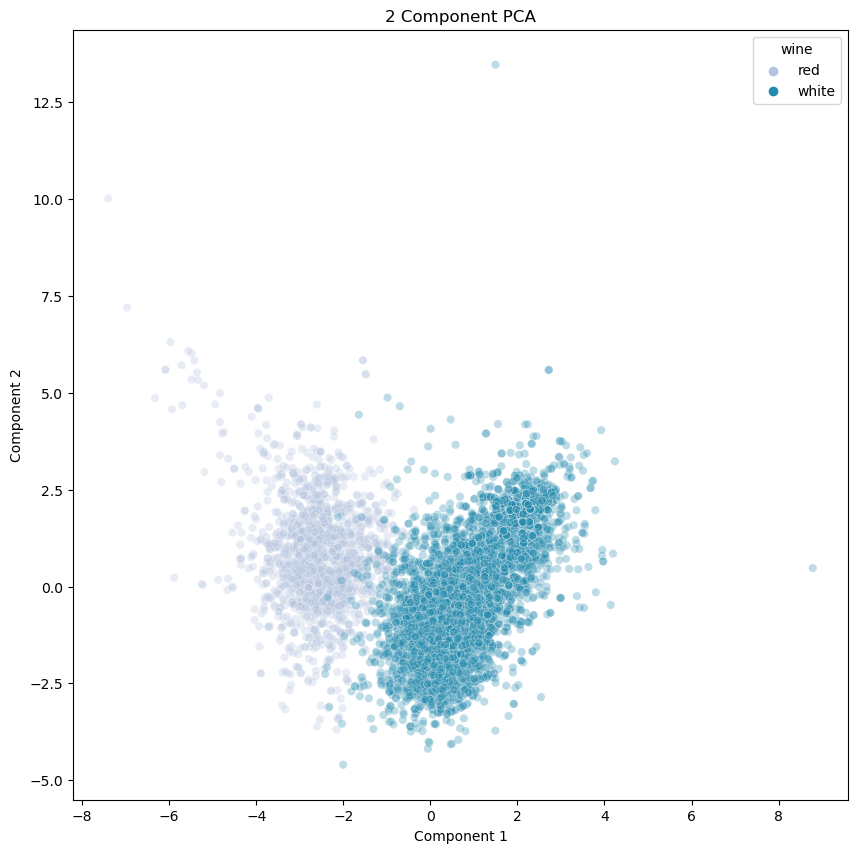

In [101]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df_wine['wine'], # Using this line to easily allow more PCs
                alpha=0.3, palette = 'PuBuGn')

# K Means Clustering Project 


For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Get the Data

**1. Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [102]:
College_Data=pd.read_csv('College_Data.csv',index_col=0)

**Check the head of the data**

In [103]:
College_Data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the info() and describe() methods on the data.**

In [104]:
College_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [105]:
College_Data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

It's time to visualize clusters!

**1. Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

<AxesSubplot:title={'center':'Grad.Rate versus Room.Board'}, xlabel='Room.Board', ylabel='Grad.Rate'>

<Figure size 640x480 with 0 Axes>

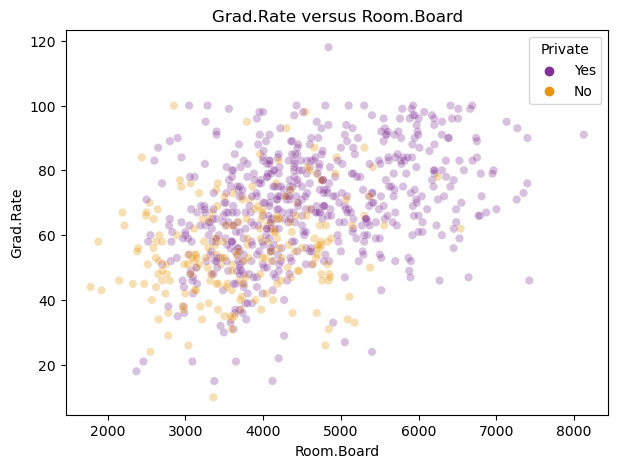

In [106]:
plt.figure()
plt.figure(figsize=(7,5))
plt.xlabel('Room.Board')
plt.ylabel('Grad.Rate')
plt.title('Grad.Rate versus Room.Board')
sns.scatterplot(x = College_Data['Room.Board'], y = College_Data['Grad.Rate'], hue=College_Data['Private'], # Using this line to easily allow more PCs
                alpha=0.3, palette = 'CMRmap')

**2. Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

<AxesSubplot:title={'center':'F.Undergrad versus Outstate'}, xlabel='Outstate', ylabel='F.Undergrad'>

<Figure size 640x480 with 0 Axes>

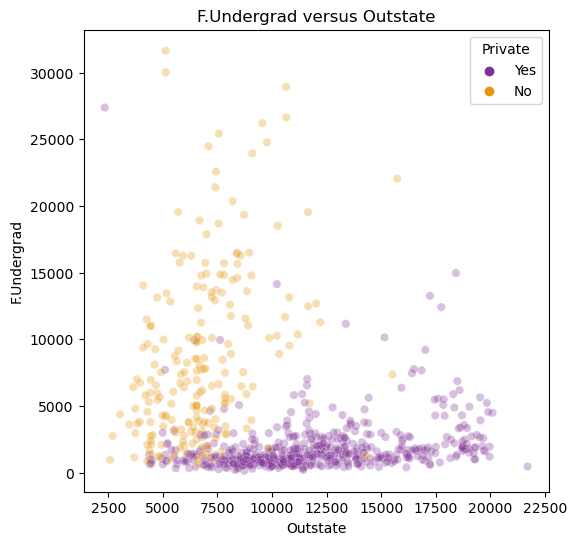

In [107]:
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Outstate')
plt.ylabel('F.Undergrad')
plt.title('F.Undergrad versus Outstate')
sns.scatterplot(x = College_Data['Outstate'], y = College_Data['F.Undergrad'], hue=College_Data['Private'], # Using this line to easily allow more PCs
                alpha=0.3, palette = 'CMRmap')

**3.Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

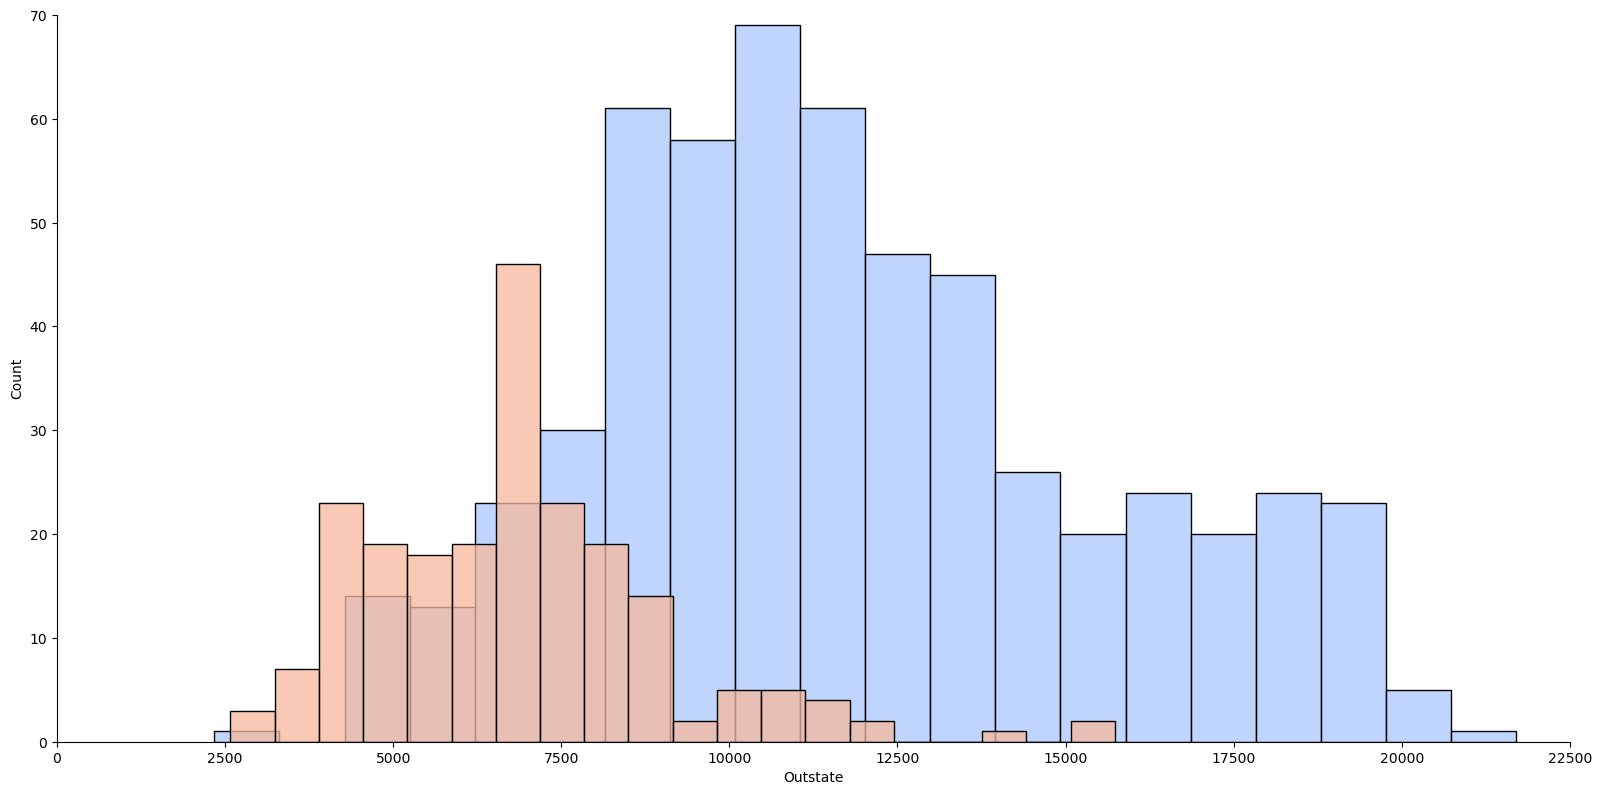

In [108]:
g = sns.FacetGrid(College_Data, hue="Private", palette='coolwarm', height = 8, aspect = 2)
g.map_dataframe(sns.histplot, x="Outstate", bins=20)
g.set(xlim=(0, 22500), ylim=(0, 70))

**4. Notice how there seems to be a private school with a graduation rate of higher than 100%. What is the name of that school?**

In [109]:
school = College_Data.index[(College_Data['Grad.Rate'] > 100)].tolist()
school[0]

'Cazenovia College'

**5. Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [110]:
College_Data.loc[College_Data['Grad.Rate'] > 100, ['Grad.Rate']] = 100

In [111]:
College_Data[(College_Data['Grad.Rate'] > 100)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


## K Means Cluster Creation

Now it is time to create the Cluster labels!

**6. Import KMeans from SciKit Learn.**

In [112]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [113]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label - we will use the clustering to classify it!**

In [114]:
College_Data_kmean = College_Data.drop(['Private'], axis = 1)
kmeans.fit(College_Data_kmean)

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [115]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**8. Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [116]:
College_Data['Cluster'] = 0
College_Data.loc[College_Data['Private'] == 'Yes', ['Cluster']] = 1

In [117]:
College_Data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Just demonstration: Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(College_Data['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups...

# Confusion matrix

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

<img src = 'https://miro.medium.com/max/720/0*6l26_xWh8zG4gue4.webp'>

- Positive (P): Observation is positive (eg. is a dog).
- Negative (N): Observation is not positive (eg. is not a dog).
- True Positive (TP): Outcome where the model correctly predicts the positive class.
- True Negative (TN): Outcome where the model correctly predicts the negative class.
- False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
- False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

In [ ]:
print(confusion_matrix(College_Data['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]


# Good luck!